# Building Autoencoders in Keras
https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
import math, random
import PIL

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, zero_one_loss
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN, OPTICS, SpectralClustering

from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# try:
#   from apyori import apriori
# except:
#   !pip install apyori
# finally:
#   from apyori import apriori
# try:
#   from umap import UMAP
# except:
#   !pip install umap-learn
# finally:
#   from umap import UMAP

# Make NumPy printouts easier to read.
np.set_printoptions(precision=2, suppress=True)

## Example with Continuous Data 

In [ ]:
dataset = pd.read_csv('Fish.csv')
dataset = dataset.drop('Species', axis=1)
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)

In [ ]:
# 6 --> 2
encoder = models.Sequential()
encoder.add(layers.Dense(units=2, activation='relu', input_shape=[6]))

In [ ]:
# 2 --> 6
decoder = models.Sequential()
decoder.add(layers.Dense(units=6, activation='relu', input_shape=[2]))

In [ ]:
# 6 --> 2 --> 6
autoencoder = models.Sequential([encoder,decoder])
autoencoder.compile(loss="mse", optimizer=SGD(learning_rate=1.5))
autoencoder.fit(scaled_dataset, scaled_dataset, epochs=5)

# Example with Image Data
---

In [ ]:
(X_train, _), (X_test, _) = datasets.mnist.load_data()
print(X_train.shape)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

(60000, 28, 28)


In [ ]:
((28*28)-1)//2

391

## Example: Add Noise on Image

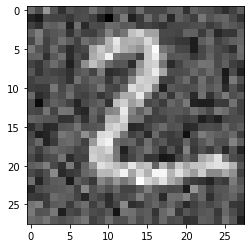

In [ ]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)

gauss_noise = layers.GaussianNoise(0.2)
sample_with_noise = gauss_noise(X_test[1], training=True)
plt.imshow(sample_with_noise)

## Encoder

In [ ]:
encoder = models.Sequential()
encoder.add(layers.Flatten(input_shape=[28, 28]))
encoder.add(layers.Dense(400, activation="relu"))
encoder.add(layers.Dense(200, activation="relu"))
encoder.add(layers.Dense(100, activation="relu"))
encoder.add(layers.Dense(50, activation="relu"))
encoder.add(layers.Dense(25, activation="relu"))

## Decoder

In [ ]:
decoder = models.Sequential()
decoder.add(layers.Dense(50, input_shape=[25], activation='relu'))
decoder.add(layers.Dense(100, activation='relu'))
decoder.add(layers.Dense(200, activation='relu'))
decoder.add(layers.Dense(400, activation='relu'))
decoder.add(layers.Dense(28 * 28, activation="sigmoid"))
decoder.add(layers.Reshape([28, 28]))

In [ ]:
autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])
# autoencoder.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

autoencoder.fit(X_train, X_train, epochs=5, shuffle=True, validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2504 - accuracy: 0.0876 - val_loss: 0.2087 - val_accuracy: 0.1342
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1801 - accuracy: 0.1654 - val_loss: 0.1675 - val_accuracy: 0.1831
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1580 - accuracy: 0.1997 - val_loss: 0.1499 - val_accuracy: 0.2069
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1480 - accuracy: 0.2144 - val_loss: 0.1452 - val_accuracy: 0.2182
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1396 - accuracy: 0.2253 - val_loss: 0.1332 - val_accuracy: 0.2201


In [ ]:
encoded_X_test = encoder.predict(X_test)
encoded_X_test.shape

(10000, 25)

In [ ]:
decoded_X_test = decoder.predict(encoded_X_test)
decoded_X_test.shape

(10000, 28, 28)

## Ploting Raw vs Decoded

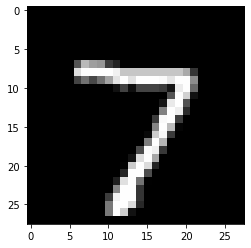

In [ ]:
plt.imshow(X_test[0])

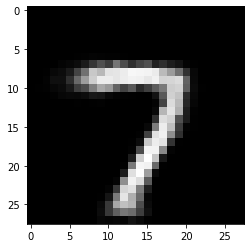

In [ ]:
plt.imshow(decoded_X_test[0])

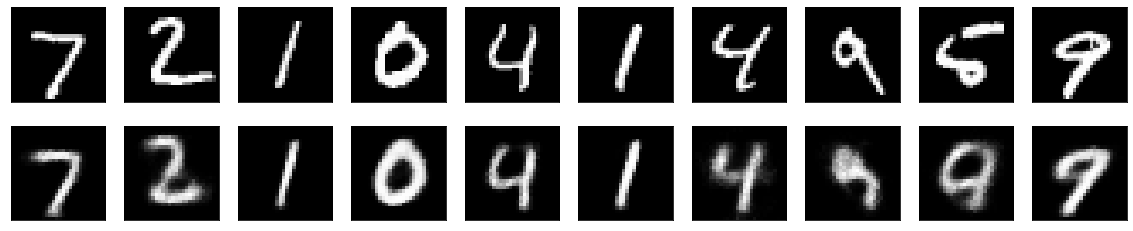

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.fit(X_train, X_train, epochs=5, shuffle=True, validation_data=[X_test, X_test])